In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

data = pd.concat([train, test], axis = 0, ignore_index = True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
def title(x):
    name_parts = x.split(',')
    title = name_parts[1].split('.')[0].strip()
    return title

data['Title'] = data['Name'].map(lambda x: title(x))

data.loc[data['Title'] == 'Don', 'Title'] = 'Mr'
data.loc[data['Title'] == 'Major', 'Title'] = 'Mr'
data.loc[data['Title'] == 'Capt', 'Title'] = 'Mr'
data.loc[data['Title'] == 'Jonkheer', 'Title'] = 'Mr'
data.loc[data['Title'] == 'Rev', 'Title'] = 'Mr'
data.loc[data['Title'] == 'Col', 'Title'] = 'Mr'
data.loc[data['Title'] == 'Countess', 'Title'] = 'Mrs'
data.loc[data['Title'] == 'Mme', 'Title'] = 'Mrs'
data.loc[data['Title'] == 'Mlle', 'Title'] = 'Miss'
data.loc[data['Title'] == 'Ms', 'Title'] = 'Miss'
data.loc[(data['Title'] == 'Dr') & (data['Sex'] == 'male'), 'Title'] = 'Mr'
data.loc[(data['Title'] == 'Dr') & (data['Sex'] == 'female'), 'Title'] = 'Mrs'
data.loc[data['Title'] == 'the Countess', 'Title'] = 'Mrs'
data.loc[data['Title'] == 'Lady', 'Title'] = 'Miss'
data.loc[data['Title'] == 'Sir', 'Title'] = 'Mr'

In [4]:
data['Title'].value_counts()

Mr        782
Miss      265
Mrs       200
Master     61
Dona        1
Name: Title, dtype: int64

In [5]:
data.loc[data['Title'] == 'Dona', 'Title'] = 'Miss'
data['Title'].value_counts()

Mr        782
Miss      266
Mrs       200
Master     61
Name: Title, dtype: int64

In [6]:
mean = data["Age"].mean()
std = data["Age"].std()
null = data["Age"].isnull().sum()
rand_age = np.random.randint(mean - std, mean + std, size = null)
age_slice = data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
data["Age"] = age_slice
data["Age"] = data["Age"].astype(int)

data.loc[data.Age <= 1.0, 'age_bins'] = '1s'
data.loc[(data['Age'] > 1.0) & (data['Age'] <= 5.0), 'age_bins'] = '5s'
data.loc[(data['Age'] > 5.0) & (data['Age'] <= 10.0), 'age_bins'] = '10s'
data.loc[(data['Age'] > 10.0) & (data['Age'] <= 15.0), 'age_bins'] = '15s'
data.loc[(data['Age'] > 15.0) & (data['Age'] <= 20.0), 'age_bins'] = '20s'
data.loc[(data['Age'] > 20.0) & (data['Age'] <= 25.0), 'age_bins'] = '25s'
data.loc[(data['Age'] > 25.0) & (data['Age'] <= 30.0), 'age_bins'] = '30s'
data.loc[(data['Age'] > 30.0) & (data['Age'] <= 35.0), 'age_bins'] = '35s'
data.loc[(data['Age'] > 35.0) & (data['Age'] <= 40.0), 'age_bins'] = '40s'
data.loc[(data['Age'] > 40.0) & (data['Age'] <= 45.0), 'age_bins'] = '45s'
data.loc[(data['Age'] > 45.0) & (data['Age'] <= 50.0), 'age_bins'] = '50s'
data.loc[(data['Age'] > 50.0) & (data['Age'] <= 55.0), 'age_bins'] = '55s'
data.loc[(data['Age'] > 55.0), 'age_bins'] = '60s'

In [7]:
data['relative_size'] = data['SibSp'] + data['Parch']
data.loc[data['relative_size'] > 0, 'travelled_alone'] = 0 #No
data.loc[data['relative_size'] == 0, 'travelled_alone'] = 1 #Yes
data['travelled_alone'] = data['travelled_alone'].astype(int)

In [8]:
data['Cabin'].loc[~data['Cabin'].isnull()] = 1  
data['Cabin'].loc[data['Cabin'].isnull()] = 0 

B:\Anaconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [9]:
data['Embarked'] = data['Embarked'].fillna('S')

In [10]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

data.loc[data['Fare'] > upper_lim, 'Fare'] = upper_lim
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,age_bins,relative_size,travelled_alone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,0,S,Mr,25s,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,66.3438,1,C,Mrs,40s,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,0,S,Miss,30s,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,1,S,Mrs,35s,1,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,0,S,Mr,35s,0,1


In [12]:
df = data.drop(['PassengerId', 'Ticket', 'Name', 'Age'], 1)
df.var()

Survived             0.236772
Pclass               0.701969
SibSp                1.085052
Parch                0.749195
Fare               432.129109
Cabin                0.174708
relative_size        2.507913
travelled_alone      0.239468
dtype: float64

In [13]:
from sklearn.preprocessing import OneHotEncoder

df.reset_index(drop=True, inplace=True)
ohe1 = OneHotEncoder(sparse=False, drop='first')
df_obj1 = ohe1.fit_transform(df[df.columns[df.dtypes=='object']])

obj_df1 = pd.DataFrame(df_obj1,columns=ohe1.get_feature_names(df.columns[df.dtypes=='object']))

df = pd.concat([df[df.columns[df.dtypes!='object']], obj_df1], axis=1)
df

,Survived,Pclass,SibSp,Parch,Fare,relative_size,travelled_alone,Sex_male,Cabin_1,Embarked_Q,...,age_bins_20s,age_bins_25s,age_bins_30s,age_bins_35s,age_bins_40s,age_bins_45s,age_bins_50s,age_bins_55s,age_bins_5s,age_bins_60s
0,0.0,3,1,0,7.2500,1,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1,1,0,66.3438,1,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3,0,0,7.9250,0,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1,1,0,53.1000,1,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3,0,0,8.0500,0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,0,8.0500,0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1305,NaN,1,0,0,66.3438,0,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1306,NaN,3,0,0,7.2500,0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1307,NaN,3,0,0,8.0500,0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scale = df.drop('Survived', axis = 1)
scaler = scaler.fit_transform(df_scale)
df_scale = pd.DataFrame(scaler, index = df.index, columns = df_scale.columns)
df_scale 

,Pclass,SibSp,Parch,Fare,relative_size,travelled_alone,Sex_male,Cabin_1,Embarked_Q,Embarked_S,...,age_bins_20s,age_bins_25s,age_bins_30s,age_bins_35s,age_bins_40s,age_bins_45s,age_bins_50s,age_bins_55s,age_bins_5s,age_bins_60s
0,0.841916,0.481288,-0.445000,-0.819894,0.073352,-1.233758,0.743497,-0.539377,-0.32204,0.655011,...,-0.395424,2.089199,-0.448238,-0.377139,-0.339104,-0.286039,-0.21532,-0.170552,-0.163299,-0.21532
1,-1.546098,0.481288,-0.445000,2.023920,0.073352,-1.233758,-1.344995,1.853992,-0.32204,-1.526692,...,-0.395424,-0.478652,-0.448238,-0.377139,2.948948,-0.286039,-0.21532,-0.170552,-0.163299,-0.21532
2,0.841916,-0.479087,-0.445000,-0.787410,-0.558346,0.810532,-1.344995,-0.539377,-0.32204,0.655011,...,-0.395424,-0.478652,2.230957,-0.377139,-0.339104,-0.286039,-0.21532,-0.170552,-0.163299,-0.21532
3,-1.546098,0.481288,-0.445000,1.386579,0.073352,-1.233758,-1.344995,1.853992,-0.32204,0.655011,...,-0.395424,-0.478652,-0.448238,2.651542,-0.339104,-0.286039,-0.21532,-0.170552,-0.163299,-0.21532
4,0.841916,-0.479087,-0.445000,-0.781395,-0.558346,0.810532,0.743497,-0.539377,-0.32204,0.655011,...,-0.395424,-0.478652,-0.448238,2.651542,-0.339104,-0.286039,-0.21532,-0.170552,-0.163299,-0.21532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.841916,-0.479087,-0.445000,-0.781395,-0.558346,0.810532,0.743497,-0.539377,-0.32204,0.655011,...,2.528929,-0.478652,-0.448238,-0.377139,-0.339104,-0.286039,-0.21532,-0.170552,-0.163299,-0.21532
1305,-1.546098,-0.479087,-0.445000,2.023920,-0.558346,0.810532,-1.344995,1.853992,-0.32204,-1.526692,...,-0.395424,-0.478652,-0.448238,-0.377139,2.948948,-0.286039,-0.21532,-0.170552,-0.163299,-0.21532
1306,0.841916,-0.479087,-0.445000,-0.819894,-0.558346,0.810532,0.743497,-0.539377,-0.32204,0.655011,...,-0.395424,-0.478652,-0.448238,-0.377139,2.948948,-0.286039,-0.21532,-0.170552,-0.163299,-0.21532
1307,0.841916,-0.479087,-0.445000,-0.781395,-0.558346,0.810532,0.743497,-0.539377,-0.32204,0.655011,...,-0.395424,-0.478652,-0.448238,-0.377139,-0.339104,-0.286039,-0.21532,-0.170552,-0.163299,-0.21532


In [15]:
from sklearn.ensemble import RandomForestRegressor

df = pd.concat([df_scale, df['Survived']], axis = 1, ignore_index = False)
df

,Pclass,SibSp,Parch,Fare,relative_size,travelled_alone,Sex_male,Cabin_1,Embarked_Q,Embarked_S,...,age_bins_25s,age_bins_30s,age_bins_35s,age_bins_40s,age_bins_45s,age_bins_50s,age_bins_55s,age_bins_5s,age_bins_60s,Survived
0,0.841916,0.481288,-0.445000,-0.819894,0.073352,-1.233758,0.743497,-0.539377,-0.32204,0.655011,...,2.089199,-0.448238,-0.377139,-0.339104,-0.286039,-0.21532,-0.170552,-0.163299,-0.21532,0.0
1,-1.546098,0.481288,-0.445000,2.023920,0.073352,-1.233758,-1.344995,1.853992,-0.32204,-1.526692,...,-0.478652,-0.448238,-0.377139,2.948948,-0.286039,-0.21532,-0.170552,-0.163299,-0.21532,1.0
2,0.841916,-0.479087,-0.445000,-0.787410,-0.558346,0.810532,-1.344995,-0.539377,-0.32204,0.655011,...,-0.478652,2.230957,-0.377139,-0.339104,-0.286039,-0.21532,-0.170552,-0.163299,-0.21532,1.0
3,-1.546098,0.481288,-0.445000,1.386579,0.073352,-1.233758,-1.344995,1.853992,-0.32204,0.655011,...,-0.478652,-0.448238,2.651542,-0.339104,-0.286039,-0.21532,-0.170552,-0.163299,-0.21532,1.0
4,0.841916,-0.479087,-0.445000,-0.781395,-0.558346,0.810532,0.743497,-0.539377,-0.32204,0.655011,...,-0.478652,-0.448238,2.651542,-0.339104,-0.286039,-0.21532,-0.170552,-0.163299,-0.21532,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.841916,-0.479087,-0.445000,-0.781395,-0.558346,0.810532,0.743497,-0.539377,-0.32204,0.655011,...,-0.478652,-0.448238,-0.377139,-0.339104,-0.286039,-0.21532,-0.170552,-0.163299,-0.21532,NaN
1305,-1.546098,-0.479087,-0.445000,2.023920,-0.558346,0.810532,-1.344995,1.853992,-0.32204,-1.526692,...,-0.478652,-0.448238,-0.377139,2.948948,-0.286039,-0.21532,-0.170552,-0.163299,-0.21532,NaN
1306,0.841916,-0.479087,-0.445000,-0.819894,-0.558346,0.810532,0.743497,-0.539377,-0.32204,0.655011,...,-0.478652,-0.448238,-0.377139,2.948948,-0.286039,-0.21532,-0.170552,-0.163299,-0.21532,NaN
1307,0.841916,-0.479087,-0.445000,-0.781395,-0.558346,0.810532,0.743497,-0.539377,-0.32204,0.655011,...,-0.478652,-0.448238,-0.377139,-0.339104,-0.286039,-0.21532,-0.170552,-0.163299,-0.21532,NaN


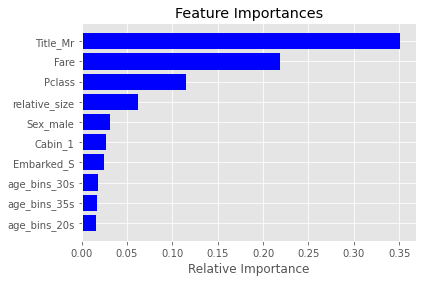

In [16]:
df_test = df.iloc[891:]
df_train = df.dropna(axis = 0)

X = df_train.drop('Survived', axis = 1)
y = df_train['Survived']

rfr = RandomForestRegressor(random_state = 1, max_depth = 10)
rfr.fit(X,y)

features = X.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [17]:
dict(reversed(sorted(zip(rfr.feature_importances_, df_train.columns.values))))

{0.3513777268291128: 'Title_Mr',
 0.21869636359472333: 'Fare',
 0.11516505939649074: 'Pclass',
 0.06207606987127422: 'relative_size',
 0.03178384331471245: 'Sex_male',
 0.027164197280656714: 'Cabin_1',
 0.024849408828554714: 'Embarked_S',
 0.017665310463309703: 'age_bins_30s',
 0.017195368750197556: 'age_bins_35s',
 0.016197680052688585: 'age_bins_20s',
 0.015220829355457552: 'SibSp',
 0.014616436488040244: 'Parch',
 0.013450730579537247: 'age_bins_25s',
 0.013250271417150959: 'age_bins_60s',
 0.00946058892606932: 'age_bins_45s',
 0.009005325364920996: 'age_bins_40s',
 0.008342773724306274: 'Embarked_Q',
 0.007124612088625498: 'age_bins_5s',
 0.006692641716178157: 'travelled_alone',
 0.006085041986771119: 'age_bins_50s',
 0.004756774994388414: 'Title_Mrs',
 0.004702530764471466: 'Title_Miss',
 0.0022085964008606335: 'age_bins_15s',
 0.0018040396821337914: 'age_bins_55s',
 0.0011077781293674235: 'age_bins_1s'}

In [18]:
features = ['Title_Mr', 'Fare', 'Pclass', 'relative_size', 'Sex_male', 'Cabin_1', 'Embarked_S', 'age_bins_30s', 'age_bins_35s', 'Parch']

In [19]:
X_train = X[features]
X_test = df_test.drop('Survived', axis = 1)[features]
y_train = y

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, y_train)
clf.best_params_

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'gini', min_samples_leaf = 1, min_samples_split = 18, n_estimators = 1500)
rf.fit(X_train, y_train)

preds = rf.predict(X_test)

In [21]:
test_data = pd.read_csv('submission.csv')
submission = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': preds})
submission = submission.astype(int)

submission.to_csv('submission.csv', index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
